**Problem Statement: To classify a given image of handwritten digit from a dataset into their respective classes from 0 to 9. The dataset consists of 60000 images of digits from 0 to 9 at a resolution of 28 x 28 pixels**

In [14]:
from __future__ import print_function

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

2.5.0


**Import and load the datat directly from Tensorflow**

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Explore the data**

In [16]:
print("train_images.shape",train_images.shape)
print("len(train_labels)",len(train_labels))
print("Labels:", train_labels)
print("train_labels",train_labels)
print("test_images.shape",test_images.shape)
print("len(test_labels)",len(test_labels))

train_images.shape (60000, 28, 28)
len(train_labels) 60000
Labels: [5 0 4 ... 5 6 8]
train_labels [5 0 4 ... 5 6 8]
test_images.shape (10000, 28, 28)
len(test_labels) 10000


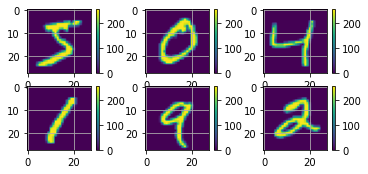

In [17]:
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(True)
plt.show()

**Preprocess the data**: Scaling the values to a range of 0 to 1 before feeding them to the neural network model

In [18]:
train_images = train_images/255.0
test_images = test_images/255.0

**Exploring the training set**

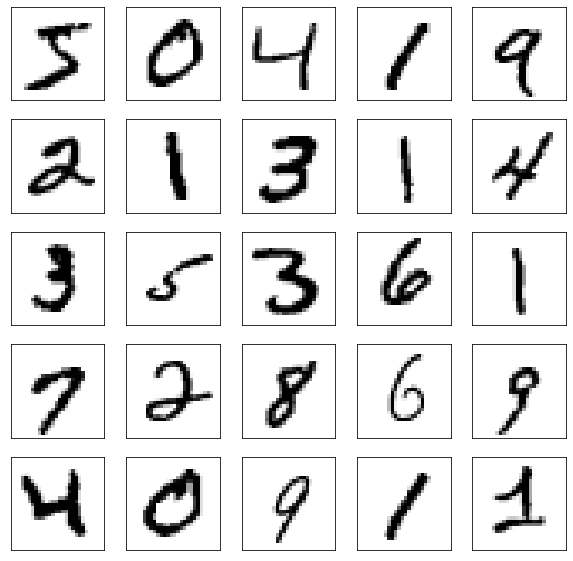

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

**Building the model**

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),                               #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),       #input layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)      #output layer
])

**Train the model**

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1138 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0780 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0451 - accuracy: 0.9858


**Evaluate accuracy**

In [22]:

test_loss, accuracy = model.evaluate(test_images, test_labels)
print("Test loss is:",test_loss)
print("Accuracy is:",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9770
Test loss is: 0.07434940338134766
Accuracy is: 0.9769999980926514


**Make predictions**

In [23]:
predictions = model.predict(test_images)

In [24]:
for i in range(5):
    print(predictions[i])
    print("Predicted value:",np.argmax(predictions[i]))
    print("Actual value:", test_labels[i])

[3.7114106e-08 6.1632135e-09 6.3851776e-06 3.8430066e-05 2.2400646e-11
 5.5167952e-08 4.8736739e-12 9.9995363e-01 3.7030688e-07 1.0802510e-06]
Predicted value: 7
Actual value: 7
[2.29477037e-09 2.84950598e-03 9.97149169e-01 1.29931755e-06
 1.37867665e-14 1.50034141e-09 7.34298122e-10 1.04748935e-12
 1.72749619e-08 2.34382414e-12]
Predicted value: 2
Actual value: 2
[2.5436367e-07 9.9955648e-01 8.3170788e-05 1.7774475e-05 1.0879233e-05
 7.6206993e-06 9.0156582e-06 2.4591910e-04 6.8592453e-05 3.3765170e-07]
Predicted value: 1
Actual value: 1
[9.99991417e-01 3.91179071e-08 1.77635548e-06 4.66366359e-08
 4.43689219e-09 2.18312252e-07 3.76073103e-06 1.09977265e-07
 3.12297033e-09 2.70721921e-06]
Predicted value: 0
Actual value: 0
[3.1235669e-07 3.5238909e-07 2.0774855e-06 1.9844785e-08 9.9801850e-01
 7.3882632e-07 5.1848798e-07 4.7863621e-05 1.1776094e-06 1.9283550e-03]
Predicted value: 4
Actual value: 4


**Using the model to identify test images**

In [25]:
for i in range(10):
      image = test_images[i]
      #print("shape of image:", image.shape)

      image = (np.expand_dims(image,0))
      #print(image.shape)

      predicted_value = model.predict(image)
      print("Predicted value:", np.argmax(predicted_value), "Actual value:", test_labels[i])

Predicted value: 7 Actual value: 7
Predicted value: 2 Actual value: 2
Predicted value: 1 Actual value: 1
Predicted value: 0 Actual value: 0
Predicted value: 4 Actual value: 4
Predicted value: 1 Actual value: 1
Predicted value: 4 Actual value: 4
Predicted value: 9 Actual value: 9
Predicted value: 5 Actual value: 5
Predicted value: 9 Actual value: 9


In [26]:
#Using random images
for i in np.random.randint(0, high=9, size=(20,)):
         image = test_images[i]
         image = (np.expand_dims(image,0))
        
         predicted_value = model.predict(image)
         predicted_value
         print("Predicted value:", np.argmax(predicted_value), "Actual value:", test_labels[i])

Predicted value: 7 Actual value: 7
Predicted value: 4 Actual value: 4
Predicted value: 4 Actual value: 4
Predicted value: 5 Actual value: 5
Predicted value: 2 Actual value: 2
Predicted value: 9 Actual value: 9
Predicted value: 9 Actual value: 9
Predicted value: 2 Actual value: 2
Predicted value: 1 Actual value: 1
Predicted value: 4 Actual value: 4
Predicted value: 1 Actual value: 1
Predicted value: 1 Actual value: 1
Predicted value: 7 Actual value: 7
Predicted value: 1 Actual value: 1
Predicted value: 0 Actual value: 0
Predicted value: 4 Actual value: 4
Predicted value: 9 Actual value: 9
Predicted value: 4 Actual value: 4
Predicted value: 0 Actual value: 0
Predicted value: 5 Actual value: 5
